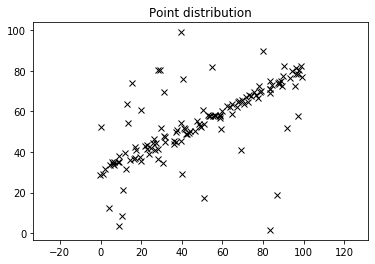

In [13]:
# Load and plot points
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

data = loadmat('points.mat')
x = data['x'].T
y=data['y'].T
plt.plot(x, y, 'kx')
plt.title('Point distribution')
plt.axis('equal')
plt.show()


In [14]:
def fit_line(x,y):
    m=(y[1]-y[0])/(x[1]-x[0])
    c=y[1]-m*x[1]
    return m,c


def distance(m,c,x0,y0):
    dist=(np.linalg.norm(y0-(m*x0)-c))/(np.sqrt(m**2+1))
    return dist

In [16]:
## Robust line fitting
##--your-code-starts-here--##
N=round((np.log(1-0.99))/(np.log(1-(1-0.5)**2))) ### numbber of itelarion
#N=100
inliner=[]
inliners_indx=[]
mean=[]
intercept=[]
inliners_x=[]
inliners_y=[]
for i in range(int(N)):
    
    sample=np.random.choice(x.shape[0],size=2, replace=True)
    point_x=x[sample]
    point_y=y[sample]
    threshold=10.0

    remaining_x=np.delete(x,sample)  ### Remving selected samples points
    remaining_y=np.delete(y,sample) ### Remving selected samples points
    m,c=fit_line(point_x,point_y)   ### Getting the slope and intercept for the selected point

    dist=np.asarray([distance(m,c,remaining_x[i],remaining_y[i]) for i in range(remaining_x.shape[0])]) ## Calculating the distance to the point
    
    indx_temp=np.argwhere(dist<=threshold)
    inliners_indx.append(indx_temp)   ### Checkinng no of inliers index
    inliner.append(np.sum(dist<=threshold))            ### Calculating number of inliners
    mean.append(m)  ## Storing mean of all lines
    intercept.append(c) ## Storing intercept of all lines
    #x_inliners=
    #y_inliners=remaining_y[inliners_indx]
    
    inliners_x.append(remaining_x[indx_temp])
    inliners_y.append(remaining_y[indx_temp])
    #outliner_x=np.delete(remaining_x,inliners_indx)
   # outliner_y=np.delete(remaining_y,inliners_indx)

inliner=np.asarray(inliner)
inliners_indx=np.asarray(inliners_indx)
inliners_x=np.asarray(inliners_x)
inliners_y=np.asarray(inliners_y)

mean=np.asarray(mean)
intercept=np.asarray(intercept)

max_inliner_ind=np.argwhere(inliner==np.max(inliner))     ### Geting the index of maximum inliners
m_selected=mean[max_inliner_ind[0]]
c_selected=intercept[max_inliner_ind[0]]
inliners_selected_x=inliners_x[max_inliner_ind[0]]
inliners_selected_y=inliners_y[max_inliner_ind[0]]

##--your-code-ends-here--##

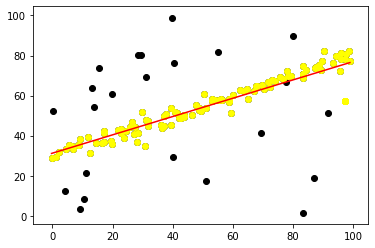

mean = [[0.45694244]]
intercept= [[31.26027845]]


In [17]:
################### PLOTTING THE RESULTS ##########################
x_temp = np.linspace(min(x),max(x),100)
y_temp = m_selected[0]*x_temp+c_selected[0]
plt.plot(x_temp, y_temp, '-r', label='y=2x+1')
plt.scatter(x, y, color='black')
plt.scatter(inliners_selected_x[0].flatten(),inliners_selected_y[0].flatten(),color='yellow')
plt.show()
print('mean =',m_selected)
print('intercept=',c_selected)

Implementing using Scikit learn

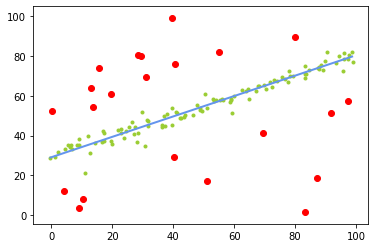

Scikit learn mean= 0.5116952355294323
Scikit learn intercept= 29.117470575731648
Scratch mean = [[0.45694244]]
Scratch intercept = [[31.26027845]]


In [18]:
############################ CHECKING WITH SCIKIT LEARN
from sklearn import linear_model, datasets

ransac = linear_model.RANSACRegressor()
ransac.fit(x.reshape(-1,1), y.reshape(-1,1))
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(x.min(), x.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

plt.scatter(x[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color="red")
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2,
         label='RANSAC regressor')
plt.show()

m_sckit=(line_y_ransac[1,0]-line_y_ransac[20,0])/(line_X[1,0]-line_X[20,0])
c_sckit=line_y_ransac[1,0]-m_sckit*line_X[1,0]
print('Scikit learn mean=',m_sckit)
print('Scikit learn intercept=',c_sckit)

print('Scratch mean =',m_selected)
print('Scratch intercept =',c_selected)